In [1]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# Load the Iris Dataset
df = pd.read_csv('Datasets/employee_attrition_train.csv')
employee_df = df.dropna()

In [3]:
# Create and score a decision tree classifier
tree_model = tree.DecisionTreeClassifier()

X = employee_df.drop("Attrition", axis=1)
X = pd.get_dummies(X)
y = employee_df["Attrition"]

In [4]:
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

In [5]:
# Split your data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6)

In [6]:
# Train your model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
# Score your model
tree_model.score(X_test, y_test)

0.7938144329896907

In [8]:
# Make predictions
y_pred = tree_model.predict(X_test)

In [9]:
# Set labels for your features
X_labels = X.columns
y_labels = ["Stayed","Left"]

In [10]:
# Create DataFrame for test features
X_df = pd.DataFrame(X_test, columns=X_labels)
X_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
803,40.0,1322.0,2.0,4,1,2048,3,52,2,1,...,0,1,0,0,0,0,1,1,1,0
790,45.0,561.0,2.0,3,1,606,4,61,3,2,...,0,0,1,0,0,1,0,1,1,0
680,39.0,1387.0,10.0,5,1,1618,2,76,3,2,...,0,0,0,0,0,1,0,1,1,0
772,33.0,1296.0,6.0,3,1,692,3,30,3,2,...,0,0,0,0,1,0,0,1,1,0
771,45.0,556.0,25.0,2,1,1888,2,93,2,2,...,0,0,0,0,0,1,0,1,1,0


In [11]:
# Create DataFrame for targets
y_df = pd.DataFrame({'predicted':y_pred, 'actual':y_test, 'error': y_pred != y_test})
y_df.head()

,predicted,actual,error
803,No,No,False
790,No,No,False
680,No,No,False
772,No,No,False
771,No,No,False


In [12]:
# Combine features and targets into one DataFrame
test_df = X_df.join(y_df)
test_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,predicted,actual,error
803,40.0,1322.0,2.0,4,1,2048,3,52,2,1,...,0,0,0,1,1,1,0,No,No,False
790,45.0,561.0,2.0,3,1,606,4,61,3,2,...,0,0,1,0,1,1,0,No,No,False
680,39.0,1387.0,10.0,5,1,1618,2,76,3,2,...,0,0,1,0,1,1,0,No,No,False
772,33.0,1296.0,6.0,3,1,692,3,30,3,2,...,0,1,0,0,1,1,0,No,No,False
771,45.0,556.0,25.0,2,1,1888,2,93,2,2,...,0,0,1,0,1,1,0,No,No,False


In [13]:
# Apply labels to targets
test_df['predicted'] = test_df['predicted'].apply(lambda y: y_labels[y])
test_df['actual'] = test_df['actual'].apply(lambda y: y_labels[y])

TypeError: list indices must be integers or slices, not str

In [14]:
# Preview the final DataFrame
test_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,predicted,actual,error
803,40.0,1322.0,2.0,4,1,2048,3,52,2,1,...,0,0,0,1,1,1,0,No,No,False
790,45.0,561.0,2.0,3,1,606,4,61,3,2,...,0,0,1,0,1,1,0,No,No,False
680,39.0,1387.0,10.0,5,1,1618,2,76,3,2,...,0,0,1,0,1,1,0,No,No,False
772,33.0,1296.0,6.0,3,1,692,3,30,3,2,...,0,1,0,0,1,1,0,No,No,False
771,45.0,556.0,25.0,2,1,1888,2,93,2,2,...,0,0,1,0,1,1,0,No,No,False


In [15]:
# Find inaccurate predictions
test_df.loc[test_df['error'] == True]

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,predicted,actual,error
431,39.0,592.0,2.0,3,1,1458,1,54,2,1,...,0,0,0,1,1,0,1,No,Yes,True
490,31.0,542.0,20.0,3,1,175,2,71,1,2,...,0,0,1,0,1,0,1,No,Yes,True
463,29.0,408.0,25.0,5,1,565,3,71,2,1,...,0,0,1,0,1,1,0,No,Yes,True
202,42.0,269.0,2.0,3,1,351,4,56,2,1,...,0,1,0,0,1,0,1,Yes,No,True
683,34.0,479.0,7.0,4,1,1577,1,35,3,1,...,0,0,0,1,1,1,0,Yes,No,True
316,33.0,587.0,10.0,1,1,584,1,38,1,1,...,0,1,0,0,1,1,0,No,Yes,True
949,21.0,984.0,1.0,1,1,1131,4,70,2,1,...,0,0,0,1,1,0,1,Yes,No,True
411,41.0,802.0,9.0,1,1,176,3,96,3,3,...,0,1,0,0,1,0,1,Yes,No,True
557,42.0,933.0,19.0,3,1,752,3,57,4,1,...,0,1,0,0,1,0,1,No,Yes,True
1016,53.0,1168.0,24.0,4,1,1968,1,66,3,3,...,0,0,0,1,1,0,1,No,Yes,True


In [16]:
# Print accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7938144329896907

In [17]:
# Score feature importance
feature_importance = tree_model.feature_importances_ 
feature_importance

array([0.07408349, 0.05559507, 0.04054696, 0.        , 0.        ,
       0.04604398, 0.        , 0.00549067, 0.02025921, 0.        ,
       0.01624484, 0.18724686, 0.03780272, 0.03464607, 0.01797649,
       0.        , 0.05046569, 0.        , 0.02247061, 0.08656707,
       0.01761332, 0.01065273, 0.018221  , 0.01017457, 0.02696473,
       0.01334729, 0.        , 0.00815116, 0.00898824, 0.        ,
       0.        , 0.01452645, 0.        , 0.        , 0.        ,
       0.00382833, 0.00551279, 0.01048628, 0.        , 0.02013395,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01615534, 0.        , 0.01115484, 0.04307189,
       0.        , 0.01525782, 0.        , 0.05031953, 0.        ])

In [18]:
feature_importance_df = pd.DataFrame({'feature': X_labels, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
feature_importance_df

,feature,importance
11,MonthlyIncome,0.187247
19,TotalWorkingYears,0.086567
0,Age,0.074083
1,DailyRate,0.055595
16,RelationshipSatisfaction,0.050466
53,OverTime_No,0.050320
5,EmployeeNumber,0.046044
49,MaritalStatus_Divorced,0.043072
2,DistanceFromHome,0.040547
12,MonthlyRate,0.037803


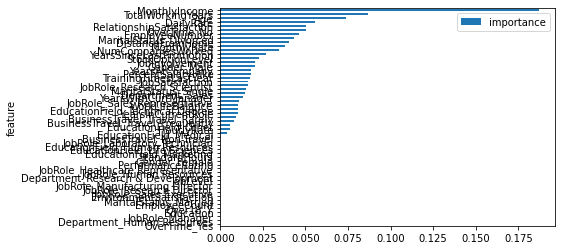

In [19]:
feature_importance_df = feature_importance_df.sort_values('importance')
feature_importance_df.set_index('feature', inplace=True)
feature_importance_df.plot(kind='barh')

In [20]:
# Create a decision tree graph
import graphviz 
dot_data = tree.export_graphviz(
    tree_model, out_file=None, 
    feature_names=iris.feature_names,  
    class_names=iris.target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('iris.png')

graph = graphviz.Source(dot_data)  
graph 

ModuleNotFoundError: No module named 'graphviz'